In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import csv
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import backend as K
from keras.models import model_from_json,load_model

from keras.metrics import Precision
from keras.metrics import Recall

from sklearn.preprocessing import MinMaxScaler
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_HEIGHT=256
IMG_WIDTH=256
IMG_CHANNELS=3

In [ ]:
folder_path=os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','datasets','UCMerced_LandUse','Images')
X_train=list()
X_test=list()
y_train=list()
y_test=list()
target=dict()

count=0
for i in os.listdir(folder_path):
    target[i]=count
    count=count+1


In [ ]:
val=1
train_data=list()
target_data=list()

for directory in os.listdir(folder_path):
    temp_folder=os.path.join(folder_path,directory)
    list_files=os.listdir(temp_folder)
    for i in range(0,len(list_files)):
        temp_path=os.path.join(temp_folder,list_files[i])
        train_data.append(temp_path)
        target_data.append([target[directory]])

In [ ]:
from tqdm import tqdm_notebook, tnrange

X=list()
y=list()

for n,val in tqdm_notebook(enumerate(train_data), total=len(train_data)):
  img = cv2.imread(train_data[n])
  img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
  X.append(img)
  
X=np.array(X)
y=np.array(target_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=42, test_size = 0.2 )

print(X_train.shape)
print(y_train.shape)


(1680, 256, 256, 3)
(1680, 1)


Data Normalization

In [ ]:
from keras.utils import normalize, to_categorical

X_train = normalize(X_train, axis=1)
X_valid = normalize(X_valid, axis=1)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)


In [ ]:
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(21, activation = 'softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 64)      2

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint('model-landuse-1.h5', verbose=1, save_best_only=True)
history = model.fit(X_train,y_train,epochs = 250,validation_data = (X_valid, y_valid))
model.save(os.path.join(os.getcwd(),'model-landuse-1.h5'))

Epoch 1/250
53/53 [==============================] - 22s 85ms/step - loss: 3.1244 - accuracy: 0.0958 - val_loss: 3.1837 - val_accuracy: 0.0381
Epoch 2/250
53/53 [==============================] - 3s 65ms/step - loss: 2.7794 - accuracy: 0.1310 - val_loss: 3.2898 - val_accuracy: 0.0405
Epoch 3/250
53/53 [==============================] - 3s 65ms/step - loss: 2.7296 - accuracy: 0.1522 - val_loss: 3.3550 - val_accuracy: 0.0548
Epoch 4/250
53/53 [==============================] - 3s 65ms/step - loss: 2.5551 - accuracy: 0.2171 - val_loss: 3.4225 - val_accuracy: 0.0548
Epoch 5/250
53/53 [==============================] - 3s 65ms/step - loss: 2.4693 - accuracy: 0.2456 - val_loss: 4.0601 - val_accuracy: 0.0476
Epoch 6/250
53/53 [==============================] - 3s 65ms/step - loss: 2.4170 - accuracy: 0.2732 - val_loss: 3.6674 - val_accuracy: 0.0524
Epoch 7/250
53/53 [==============================] - 3s 65ms/step - loss: 2.3199 - accuracy: 0.2946 - val_loss: 3.7991 - val_accuracy: 0.0524
Epoch

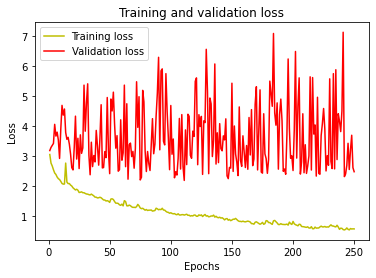

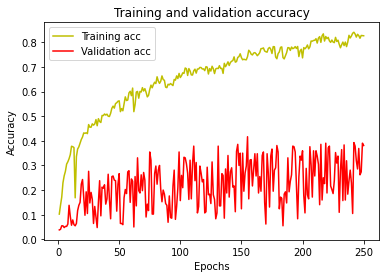

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loaded_model=load_model('model-landuse-1.h5')

In [ ]:
y_train_pred=loaded_model.predict(X_train)
y_train_pred=np.argmax(y_train_pred,axis=-1)
print(y_train_pred)
#y_train=np.argmax(y_train,axis=-1)
print(y_train)
y_valid_pred=loaded_model.predict(X_valid)
y_valid_pred=np.argmax(y_valid_pred,axis=-1)
y_valid=np.argmax(y_valid,axis=-1)


[15  8  4 ... 11 16 19]
[15  8  4 ... 11 12  8]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred,average='weighted'))
print('Recall:', recall_score(y_train, y_train_pred,average='weighted'))
print('F1 score:', f1_score(y_train, y_train_pred,average='weighted'))


Accuracy: 0.7755952380952381
Precision: 0.7907485565752135
Recall: 0.7755952380952381
F1 score: 0.7767214017943437


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy:', accuracy_score(y_valid, y_valid_pred))
print('Precision:', precision_score(y_valid, y_valid_pred,average='weighted'))
print('Recall:', recall_score(y_valid, y_valid_pred,average='weighted'))
print('F1 score:', f1_score(y_valid, y_valid_pred,average='weighted'))


Accuracy: 0.38095238095238093
Precision: 0.36319286335586415
Recall: 0.38095238095238093
F1 score: 0.3534533589645111
